#Pranav Sati - 2021300107

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("/content/Adidas US Sales Datasets.xlsx")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Bar chart: Total Sales by Product

<ipython-input-15-cc57f589df6d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Total Sales', data=df, ci=None)


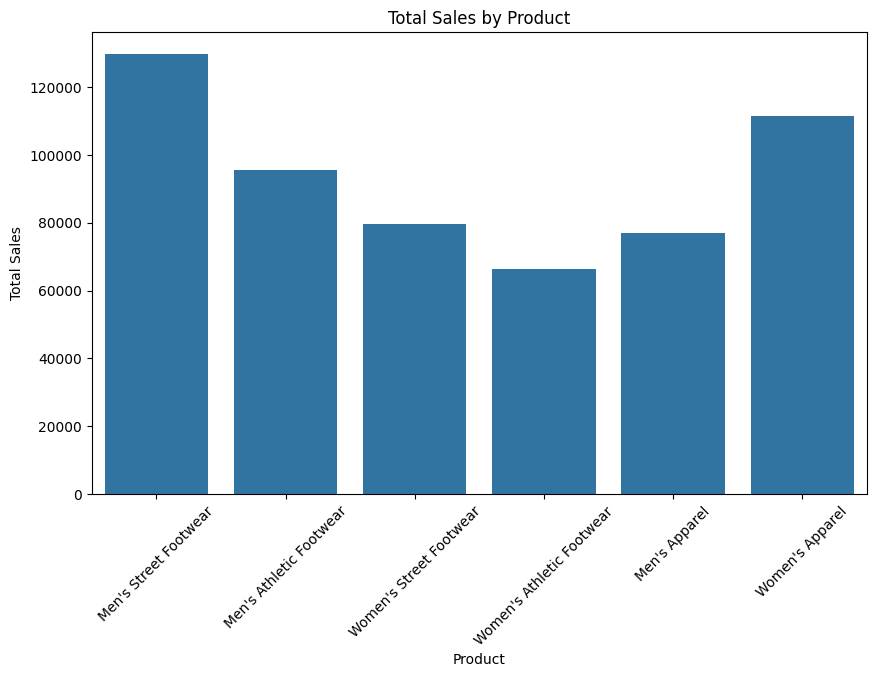

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total Sales', data=df, ci=None)
plt.title('Total Sales by Product')
plt.xticks(rotation=45)
plt.show()

 Pie chart: Distribution of Sales Methods

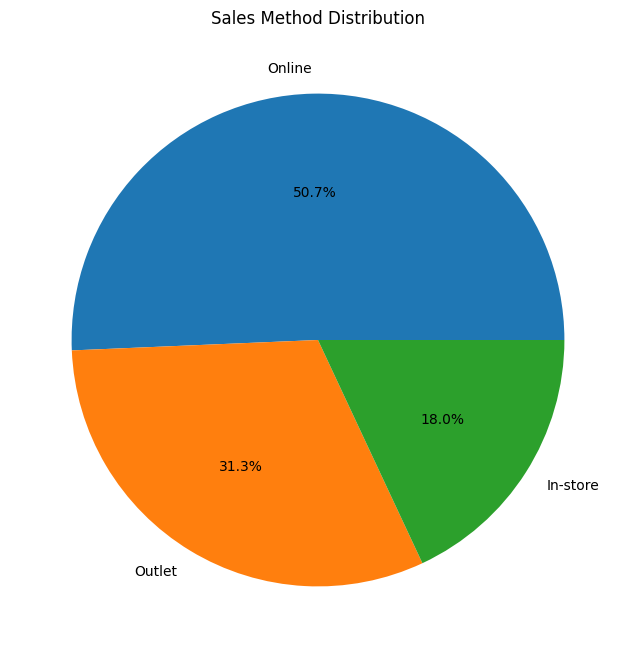

In [19]:
plt.figure(figsize=(8, 8))
df['Sales Method'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sales Method Distribution')
plt.ylabel('')
plt.show()

Histogram: Distribution of Units Sold

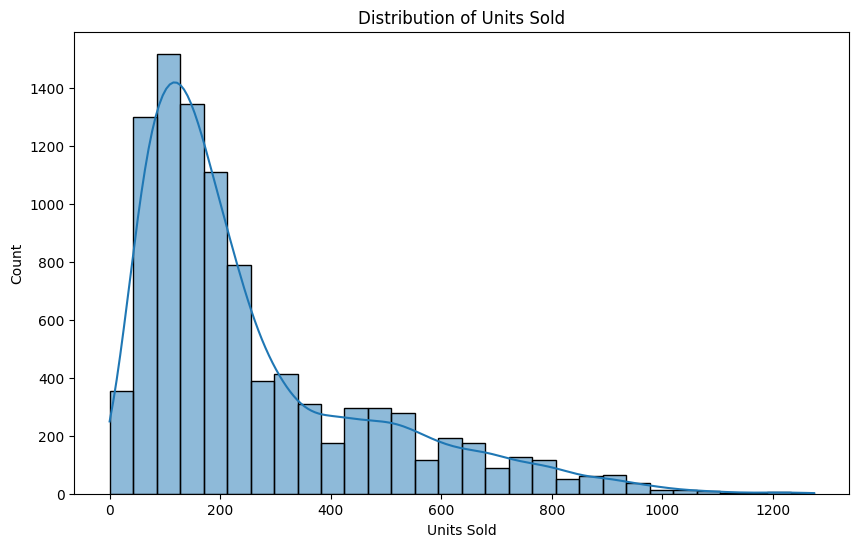

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.show()

Timeline chart: Total Sales Over Time

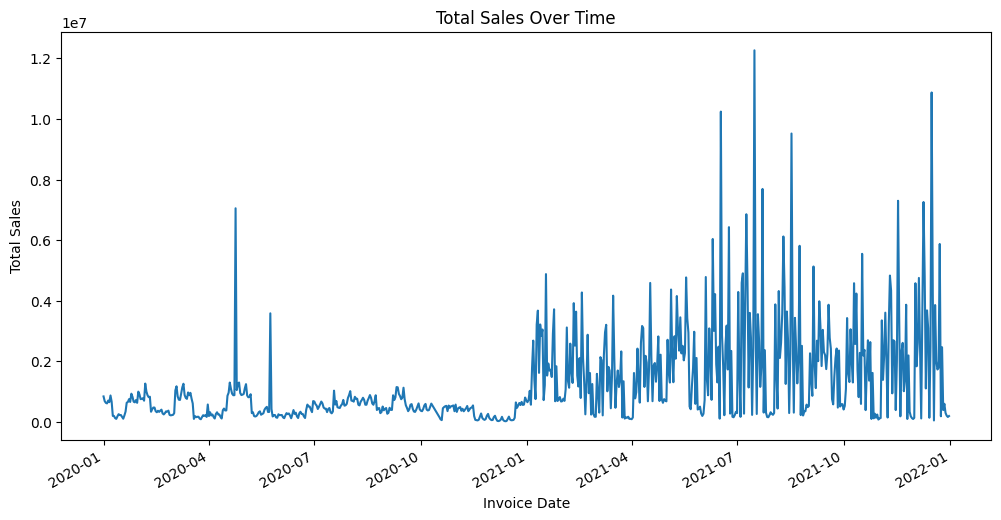

In [22]:
plt.figure(figsize=(12, 6))
df.groupby('Invoice Date')['Total Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.show()

Scatter plot: Price per Unit vs Units Sold

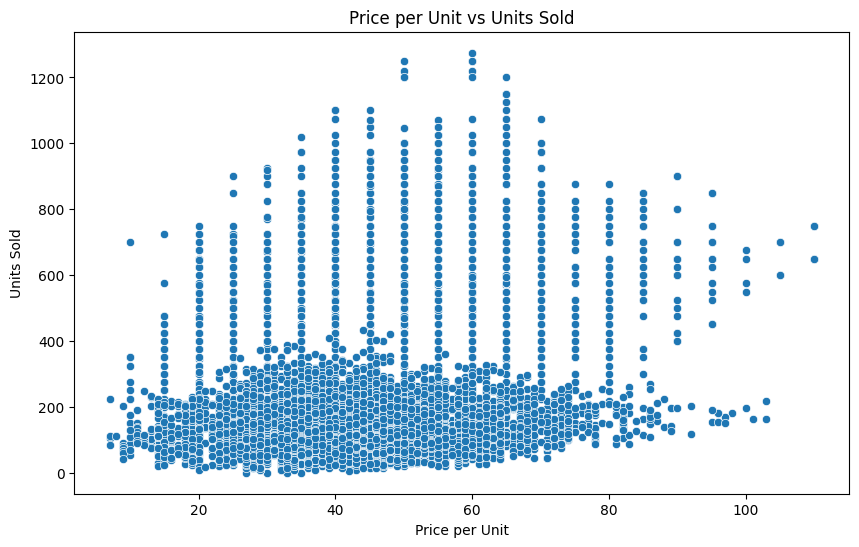

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Units Sold', data=df)
plt.title('Price per Unit vs Units Sold')
plt.show()


Bubble plot: Units Sold vs Total Sales, Bubble Size by Operating Profit

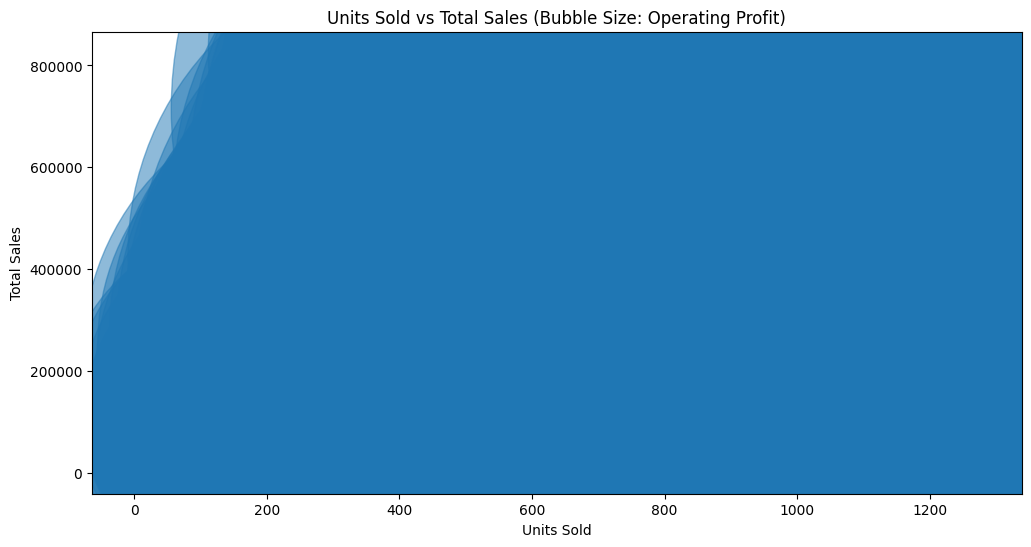

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df['Units Sold'], y=df['Total Sales'],
            s=df['Operating Profit'], alpha=0.5)
plt.title('Units Sold vs Total Sales (Bubble Size: Operating Profit)')
plt.xlabel('Units Sold')
plt.ylabel('Total Sales')
plt.show()


Calculate Product-wise Sales

In [26]:
product_sales = df.groupby('Product')['Total Sales'].sum().reset_index()
product_sales.columns = ['Product', 'Total Sales']
print(product_sales)

                     Product  Total Sales
0              Men's Apparel  123728632.0
1    Men's Athletic Footwear  153673680.0
2      Men's Street Footwear  208826244.0
3            Women's Apparel  179038860.0
4  Women's Athletic Footwear  106631896.0
5    Women's Street Footwear  128002813.0


Calculate Region-wise Sales

In [27]:
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()
region_sales.columns = ['Region', 'Total Sales']
print(region_sales)

      Region  Total Sales
0    Midwest  135800459.0
1  Northeast  186324067.0
2      South  144663181.0
3  Southeast  163171236.0
4       West  269943182.0
